## Performance plots

... for the Phase-2 L1 Trigger Upgrade TDR

In [1]:
# Setup matplotlib
import numpy as np
#import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from rootpy.plotting import Hist, Hist2D, Graph, Efficiency, Legend
from rootpy.io import root_open
from rootpy.memory.keepalive import keepalive
import rootpy.plotting.root2matplotlib as rplt

# Adjust matplotlib logging
import logging
mpl_logger = logging.getLogger('matplotlib')
mpl_logger.setLevel(logging.WARNING)

Welcome to JupyROOT 6.14/09


In [3]:
infile_effie_200 = '../test6/histos_tbc_200_add.29a.root'
infile_rates_200 = '../test6/histos_tbb_200_add.29a.root'
infile_rates_140 = '../test6/histos_tbb_140_add.29a.root'
infile_rates_250 = '../test6/histos_tbb_250_add.29a.root'

hname2026_f = lambda hname: 'emtf2026_' + hname[5:]

color_a = 'red'
color_b = 'blue'

from six.moves import range, zip, map, filter

### styles

In [4]:
from ROOT import (gROOT, gPad, gStyle, TFile, TCanvas, TH1F, TH2F, TEfficiency, 
                  TGraph, TGraphAsymmErrors, TColor, TLatex, TLegend, TLine)

gROOT.LoadMacro('../test6/tdrstyle.C')
gROOT.ProcessLine('setTDRStyle();')

# personal
gStyle.SetMarkerStyle(1)
gStyle.SetEndErrorSize(0)
gROOT.ForceStyle()

In [5]:
# Adapted from PlotTemplate.C, which comes from:
#     https://twiki.cern.ch/twiki/pub/CMS/L1TriggerPhase2Muons/PlottingTemplate.zip
#     (Template Root scripts for the format recommended by the L1 Upgrade management)
# The PlottingTemplate repository can also be found at:
#     https://github.com/davignon/PlottingTemplate

def CreateCanvas(CanvasName='myCanvasName', LogY=False, Grid=True):
  c = TCanvas(CanvasName, CanvasName, 800, 800)
  c.SetLeftMargin(0.16)
  c.SetRightMargin(0.04)
  if Grid:
    c.SetGrid()
  if LogY:
    c.SetLogy()
  return c

def DrawPrelimLabel(CanvasName):
  c = gROOT.FindObject(CanvasName)
  c.cd()
  tex = TLatex()
  tex.SetTextSize(0.03)
  tex.DrawLatexNDC(c.GetLeftMargin() + 0.01, 0.91, '#scale[1.5]{CMS Simulation}')
  tex.Draw('same')
  return

def DrawLumiLabel(CanvasName, Lumi='35.9'):
  c = gROOT.FindObject(CanvasName)
  c.cd()
  tex = TLatex()
  tex.SetTextSize(0.035)
  if Lumi:
    toDisplay = Lumi + ' fb^{-1} (14 TeV)'
  else:
    toDisplay = ' (14 TeV)'
  tex.DrawLatexNDC(0.86 - c.GetRightMargin(), 0.91, toDisplay)
  tex.Draw('same')
  return
  
def SaveCanvas(CanvasName, PlotName='myPlotName'):
  c = gROOT.FindObject(CanvasName)
  c.cd()
  c.SaveAs(PlotName + '.pdf')
  c.SaveAs(PlotName + '.root')
  return

# Use snake_case
create_canvas = CreateCanvas
draw_prelim_label = DrawPrelimLabel
draw_lumi_label = DrawLumiLabel
save_canvas = SaveCanvas

### 1.1) Efficiency vs pT

Compare EMTF++ to phase-1 EMTF at a nominal pT>20 Threshold

In [6]:
def doit():
  PlotName = 'efficiency_vs_pt_20GeV'
  LogY = False
  DisplayGrid = True
  Lumi = ''
  minimumX = 0.
  maximumX = 100.
  minimumY = 0.
  maximumY = 1.2
  xtitle = 'p_{T} [GeV]'
  ytitle = 'Efficiency'
  
  # Adapted from ExampleUsage.C, which comes from
  #     https://twiki.cern.ch/twiki/pub/CMS/L1TriggerPhase2Muons/PlottingTemplate.zip
  #     (Template Root scripts for the format recommended by the L1 Upgrade management)
  # The PlottingTemplate repository can also be found at:
  #     https://github.com/davignon/PlottingTemplate

  # canvas
  myCanvas = create_canvas(PlotName, LogY, DisplayGrid)
  myCanvas.Draw()
  
  # a function / a histo
  gr = h1a_eff.CreateGraph()
  gr.Draw("ap")
  myFunction = gr.GetHistogram()
  
  # axis labels ranges & names
  myFunction.SetMinimum(minimumY)
  myFunction.SetMaximum(maximumY)
  myFunction.GetXaxis().SetRangeUser(minimumX,maximumX)
  myFunction.GetYaxis().SetTitle(ytitle)
  myFunction.GetXaxis().SetTitle(xtitle)
  #myFunction.GetXaxis().SetTitleOffset(1.2)
  #myFunction.GetYaxis().SetTitleOffset(1.4)
  
  # line style
  #myFunction.SetLineColor(600)  # kBlue
  #myFunction.SetLineWidth(3)
  h1a_eff.linecolor = color_a
  h1b_eff.linecolor = color_b
  h1a_eff.linewidth = 3
  h1b_eff.linewidth = 3
  h1a_eff.markercolor = color_a
  h1b_eff.markercolor = color_b
  h1a_eff.markerstyle = 'circle'
  h1b_eff.markerstyle = 'circle'
  
  # drawing
  myFunction.Draw()
  h1a_eff.Draw("same")
  h1b_eff.Draw("same")
  
  # legend
  #leg = TLegend(0.14,0.76,0.75,0.86)
  #leg.SetBorderSize(0)
  #leg.SetFillStyle(0)
  #leg.SetTextSize(0.035)
  #leg.SetHeader("here is a beautiful header")
  #leg.AddEntry(myFunction,"description of myFunction")
  leg = Legend(2, topmargin=0.5, textsize=0.035)
  leg.SetBorderSize(0)
  leg.AddEntry(h1a_eff, "EMTF")
  leg.AddEntry(h1b_eff, "EMTF++")
  leg.Draw("same")
  
  # keepalive
  keepalive(h1a_eff, myFunction)
  keepalive(h1a_eff, leg)
  
  # save
  draw_prelim_label(PlotName)
  draw_lumi_label(PlotName, Lumi)
  save_canvas(PlotName, PlotName)
  return

INFO:ROOT.TCanvas.Print] pdf file efficiency_vs_pt_20GeV.pdf has been created
INFO:ROOT.TCanvas.SaveAs] ROOT file efficiency_vs_pt_20GeV.root has been created


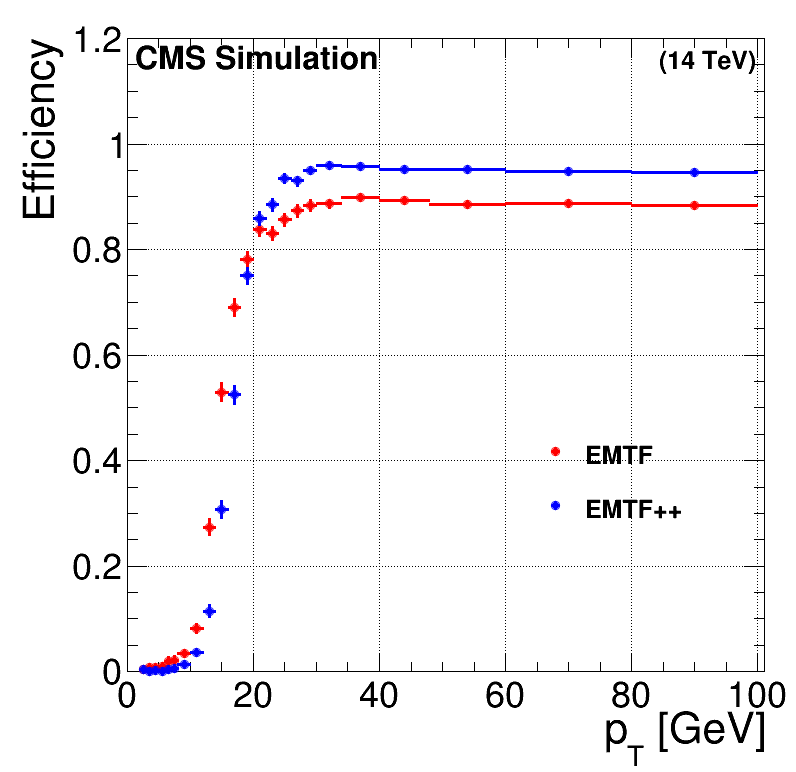

In [7]:
hname = 'emtf_eff_vs_genpt_l1pt20'

with root_open(infile_effie_200) as f:
  h1a_denom = f.Get(hname + '_denom')
  h1a_numer = f.Get(hname + '_numer')
  h1b_denom = f.Get(hname2026_f(hname) + '_denom')
  h1b_numer = f.Get(hname2026_f(hname) + '_numer')
  h1a_eff = Efficiency(h1a_numer, h1a_denom)
  h1b_eff = Efficiency(h1b_numer, h1b_denom)

doit()

### 1.2) Efficiency vs pT

For EMTF++ alone compare turn on at 5, 10, 20 GeV in one single figure

In [8]:
def doit():
  PlotName = 'efficiency_vs_pt_5_10_20GeV'
  LogY = False
  DisplayGrid = True
  Lumi = ''
  minimumX = 0.
  maximumX = 100.
  minimumY = 0.
  maximumY = 1.2
  xtitle = 'p_{T} [GeV]'
  ytitle = 'Efficiency'
  
  # canvas
  myCanvas = create_canvas(PlotName, LogY, DisplayGrid)
  myCanvas.Draw()
  
  # a function / a histo
  gr = h1b_a_eff.CreateGraph()
  gr.Draw("ap")
  myFunction = gr.GetHistogram()
  
  # axis labels ranges & names
  myFunction.SetMinimum(minimumY)
  myFunction.SetMaximum(maximumY)
  myFunction.GetXaxis().SetRangeUser(minimumX,maximumX)
  myFunction.GetYaxis().SetTitle(ytitle)
  myFunction.GetXaxis().SetTitle(xtitle)
  #myFunction.GetXaxis().SetTitleOffset(1.2)
  #myFunction.GetYaxis().SetTitleOffset(1.4)
  
  # line style
  #myFunction.SetLineColor(600)  # kBlue
  #myFunction.SetLineWidth(3)
  h1b_a_eff.linecolor = '#9999FF'
  h1b_b_eff.linecolor = '#4D4DFF'
  h1b_c_eff.linecolor = color_b
  h1b_a_eff.linewidth = 3
  h1b_b_eff.linewidth = 3
  h1b_c_eff.linewidth = 3
  h1b_a_eff.markercolor = '#9999FF'
  h1b_b_eff.markercolor = '#4D4DFF'
  h1b_c_eff.markercolor = color_b
  h1b_a_eff.markerstyle = 'circle'
  h1b_b_eff.markerstyle = 'circle'
  h1b_c_eff.markerstyle = 'circle'
  
  # drawing
  myFunction.Draw()
  h1b_a_eff.Draw("same")
  h1b_b_eff.Draw("same")
  h1b_c_eff.Draw("same")
  
  # legend
  #leg = TLegend(0.14,0.76,0.75,0.86)
  #leg.SetBorderSize(0)
  #leg.SetFillStyle(0)
  #leg.SetTextSize(0.035)
  #leg.SetHeader("here is a beautiful header")
  #leg.AddEntry(myFunction,"description of myFunction")
  leg = Legend(3, topmargin=0.5, textsize=0.03)
  leg.SetBorderSize(0)
  leg.AddEntry(h1b_a_eff, "L1 p_{T} > 5 GeV")
  leg.AddEntry(h1b_b_eff, "L1 p_{T} > 10 GeV")
  leg.AddEntry(h1b_c_eff, "L1 p_{T} > 20 GeV")
  leg.Draw("same")
  
  # keepalive
  keepalive(h1b_a_eff, myFunction)
  keepalive(h1b_a_eff, leg)
  
  # save
  draw_prelim_label(PlotName)
  draw_lumi_label(PlotName, Lumi)
  save_canvas(PlotName, PlotName)
  return

INFO:ROOT.TCanvas.Print] pdf file efficiency_vs_pt_5_10_20GeV.pdf has been created
INFO:ROOT.TCanvas.SaveAs] ROOT file efficiency_vs_pt_5_10_20GeV.root has been created


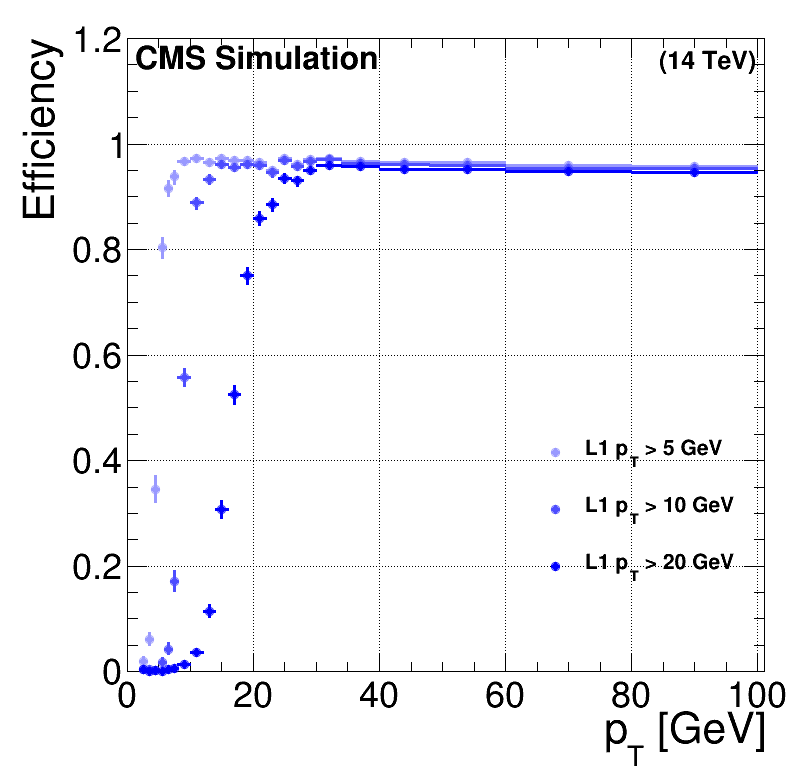

In [9]:
hname = 'emtf_eff_vs_genpt_l1pt20'

with root_open(infile_effie_200) as f:
  h1b_a_denom = f.Get(hname2026_f(hname.replace('_l1pt20', '_l1pt5')) + '_denom')
  h1b_a_numer = f.Get(hname2026_f(hname.replace('_l1pt20', '_l1pt5')) + '_numer')
  h1b_a_eff = Efficiency(h1b_a_numer, h1b_a_denom)
  h1b_b_denom = f.Get(hname2026_f(hname.replace('_l1pt20', '_l1pt10')) + '_denom')
  h1b_b_numer = f.Get(hname2026_f(hname.replace('_l1pt20', '_l1pt10')) + '_numer')
  h1b_b_eff = Efficiency(h1b_b_numer, h1b_b_denom)
  h1b_c_denom = f.Get(hname2026_f(hname.replace('_l1pt20', '_l1pt20')) + '_denom')
  h1b_c_numer = f.Get(hname2026_f(hname.replace('_l1pt20', '_l1pt20')) + '_numer')
  h1b_c_eff = Efficiency(h1b_c_numer, h1b_c_denom)

doit()

### 1.3) Efficiency vs eta

Compare to phase-1 EMTF (for pT>20 GeV)

In [10]:
def doit():
  PlotName = 'efficiency_vs_eta_20GeV'
  LogY = False
  DisplayGrid = True
  Lumi = ''
  minimumX = 1.0
  maximumX = 2.5
  minimumY = 0.
  maximumY = 1.2
  xtitle = '|#eta|'
  ytitle = 'Efficiency'
  
  # canvas
  myCanvas = create_canvas(PlotName, LogY, DisplayGrid)
  myCanvas.Draw()
  
  # a function / a histo
  gr = h1a_eff.CreateGraph()
  gr.Draw("ap")
  myFunction = gr.GetHistogram()
  
  # axis labels ranges & names
  myFunction.SetMinimum(minimumY)
  myFunction.SetMaximum(maximumY)
  myFunction.GetXaxis().SetRangeUser(minimumX,maximumX)
  myFunction.GetYaxis().SetTitle(ytitle)
  myFunction.GetXaxis().SetTitle(xtitle)
  #myFunction.GetXaxis().SetTitleOffset(1.2)
  #myFunction.GetYaxis().SetTitleOffset(1.4)
  
  # line style
  #myFunction.SetLineColor(600)  # kBlue
  #myFunction.SetLineWidth(3)
  h1a_eff.linecolor = color_a
  h1b_eff.linecolor = color_b
  h1a_eff.linewidth = 3
  h1b_eff.linewidth = 3
  h1a_eff.markercolor = color_a
  h1b_eff.markercolor = color_b
  h1a_eff.markerstyle = 'circle'
  h1b_eff.markerstyle = 'circle'
  
  # drawing
  myFunction.Draw()
  h1a_eff.Draw("same")
  h1b_eff.Draw("same")
  
  # legend
  #leg = TLegend(0.14,0.76,0.75,0.86)
  #leg.SetBorderSize(0)
  #leg.SetFillStyle(0)
  #leg.SetTextSize(0.035)
  #leg.SetHeader("here is a beautiful header")
  #leg.AddEntry(myFunction,"description of myFunction")
  leg = Legend(2, topmargin=0.5, textsize=0.035)
  leg.SetBorderSize(0)
  leg.AddEntry(h1a_eff, "EMTF")
  leg.AddEntry(h1b_eff, "EMTF++")
  leg.Draw("same")
  
  # keepalive
  keepalive(h1a_eff, myFunction)
  keepalive(h1a_eff, leg)
  
  # save
  draw_prelim_label(PlotName)
  draw_lumi_label(PlotName, Lumi)
  save_canvas(PlotName, PlotName)
  return

INFO:ROOT.TCanvas.Print] pdf file efficiency_vs_eta_20GeV.pdf has been created
INFO:ROOT.TCanvas.SaveAs] ROOT file efficiency_vs_eta_20GeV.root has been created


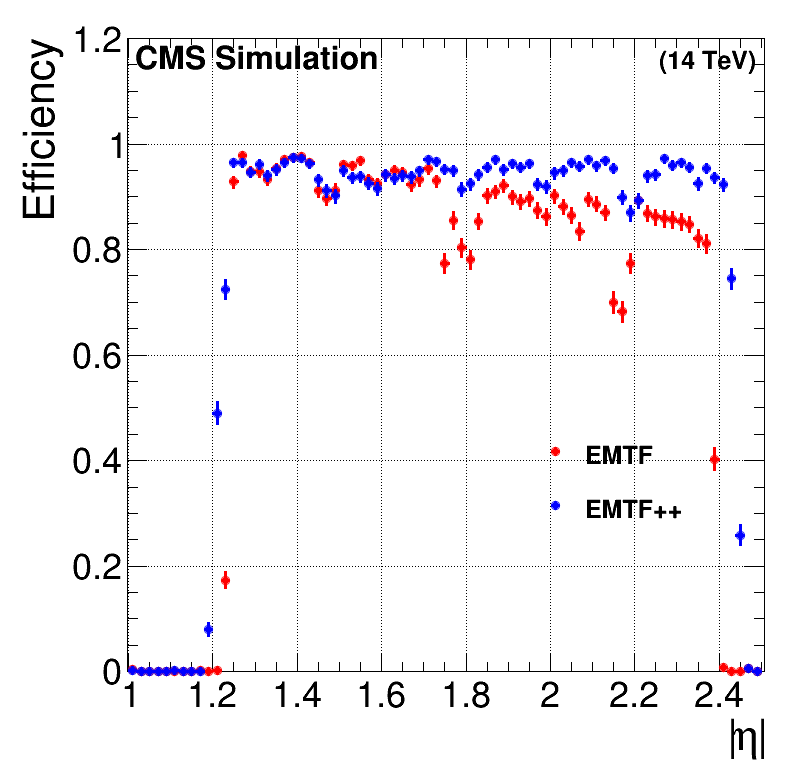

In [11]:
hname = 'emtf_eff_vs_geneta_l1pt20'

with root_open(infile_effie_200) as f:
  h1a_denom = f.Get(hname + '_denom')
  h1a_numer = f.Get(hname + '_numer')
  h1b_denom = f.Get(hname2026_f(hname) + '_denom')
  h1b_numer = f.Get(hname2026_f(hname) + '_numer')
  h1a_eff = Efficiency(h1a_numer, h1a_denom)
  h1b_eff = Efficiency(h1b_numer, h1b_denom)

doit()

### 1.4) Efficiency vs eta

Compare to phase-1 EMTF (for low pT: 5 < pT < 20)

In [12]:
def doit():
  PlotName = 'efficiency_vs_eta_5to20GeV'
  LogY = False
  DisplayGrid = True
  Lumi = ''
  minimumX = 1.0
  maximumX = 2.5
  minimumY = 0.
  maximumY = 1.2
  xtitle = '|#eta|'
  ytitle = 'Efficiency'
  
  # canvas
  myCanvas = create_canvas(PlotName, LogY, DisplayGrid)
  myCanvas.Draw()
  
  # a function / a histo
  gr = h1a_eff.CreateGraph()
  gr.Draw("ap")
  myFunction = gr.GetHistogram()
  
  # axis labels ranges & names
  myFunction.SetMinimum(minimumY)
  myFunction.SetMaximum(maximumY)
  myFunction.GetXaxis().SetRangeUser(minimumX,maximumX)
  myFunction.GetYaxis().SetTitle(ytitle)
  myFunction.GetXaxis().SetTitle(xtitle)
  #myFunction.GetXaxis().SetTitleOffset(1.2)
  #myFunction.GetYaxis().SetTitleOffset(1.4)
  
  # line style
  #myFunction.SetLineColor(600)  # kBlue
  #myFunction.SetLineWidth(3)
  h1a_eff.linecolor = color_a
  h1b_eff.linecolor = color_b
  h1a_eff.linewidth = 3
  h1b_eff.linewidth = 3
  h1a_eff.markercolor = color_a
  h1b_eff.markercolor = color_b
  h1a_eff.markerstyle = 'circle'
  h1b_eff.markerstyle = 'circle'
  
  # drawing
  myFunction.Draw()
  h1a_eff.Draw("same")
  h1b_eff.Draw("same")
  
  # legend
  #leg = TLegend(0.14,0.76,0.75,0.86)
  #leg.SetBorderSize(0)
  #leg.SetFillStyle(0)
  #leg.SetTextSize(0.035)
  #leg.SetHeader("here is a beautiful header")
  #leg.AddEntry(myFunction,"description of myFunction")
  leg = Legend(2, topmargin=0.5, textsize=0.035)
  leg.SetBorderSize(0)
  leg.AddEntry(h1a_eff, "EMTF")
  leg.AddEntry(h1b_eff, "EMTF++")
  leg.Draw("same")
  
  # keepalive
  keepalive(h1a_eff, myFunction)
  keepalive(h1a_eff, leg)
  
  # save
  draw_prelim_label(PlotName)
  draw_lumi_label(PlotName, Lumi)
  save_canvas(PlotName, PlotName)
  return

INFO:ROOT.TCanvas.Print] pdf file efficiency_vs_eta_5to20GeV.pdf has been created
INFO:ROOT.TCanvas.SaveAs] ROOT file efficiency_vs_eta_5to20GeV.root has been created


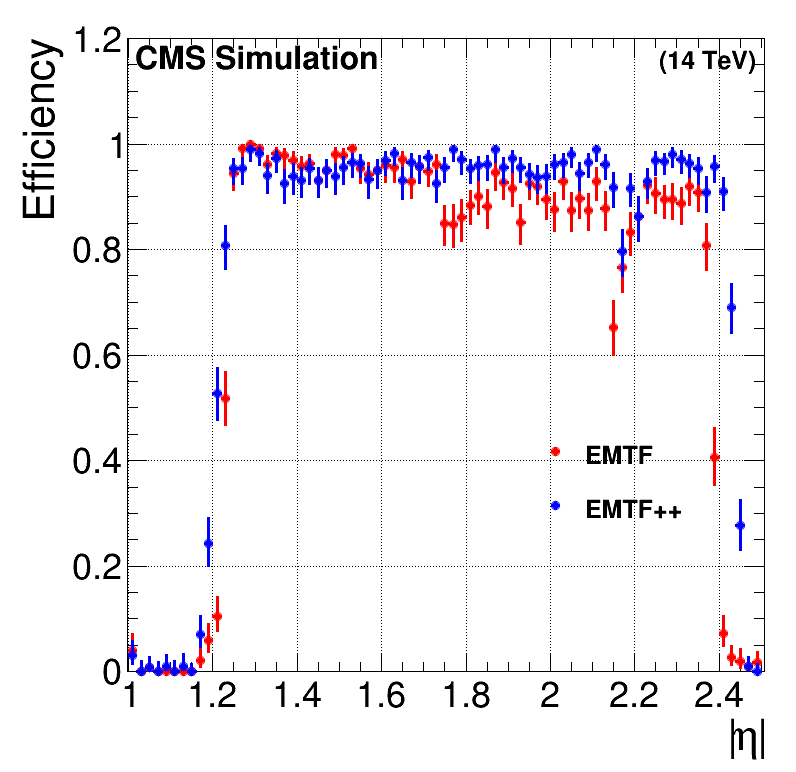

In [13]:
hname = 'emtf_eff_vs_geneta_lowpt_l1pt5'

with root_open(infile_effie_200) as f:
  h1a_denom = f.Get(hname + '_denom')
  h1a_numer = f.Get(hname + '_numer')
  h1b_denom = f.Get(hname2026_f(hname) + '_denom')
  h1b_numer = f.Get(hname2026_f(hname) + '_numer')
  h1a_eff = Efficiency(h1a_numer, h1a_denom)
  h1b_eff = Efficiency(h1b_numer, h1b_denom)

doit()

### 1.5) Rate vs pT

Compare EMTF++ to EMTF

In [14]:
def make_ptcut(h):
  use_overflow = True
  binsum = 0
  binerr2 = 0
  for ib in xrange(h.GetNbinsX()+2-1, 0-1, -1):
    if (not use_overflow) and (ib == 0 or ib == h.GetNbinsX()+1):
      continue
    binsum += h.GetBinContent(ib)
    binerr2 += h.GetBinError(ib)**2
    h.SetBinContent(ib, binsum)
    h.SetBinError(ib, np.sqrt(binerr2))
  return

def make_rate(h, nevents):
  orbitFreq = 11.2456  # kHz
  nCollBunches = 2808  # assume lumi=8e34, PU=200, xsec_pp=80mb
  nZeroBiasEvents = float(nevents)
  convFactor = orbitFreq * nCollBunches / nZeroBiasEvents
  h.Scale(convFactor)
  return

In [15]:
def doit():
  PlotName = 'rate_vs_pt'
  LogY = True
  DisplayGrid = True
  Lumi = ''
  minimumX = 0.
  maximumX = 100.
  minimumY = 0.3
  maximumY = 3e4
  xtitle = 'L1 p_{T} threshold [GeV]'
  ytitle = 'Trigger rate [kHz]'
  
  # canvas
  myCanvas = create_canvas(PlotName, LogY, DisplayGrid)
  myCanvas.Draw()
  
  # a function / a histo
  myFunction = h1a
  
  # axis labels ranges & names
  myFunction.SetMinimum(minimumY)
  myFunction.SetMaximum(maximumY)
  myFunction.GetXaxis().SetRangeUser(minimumX,maximumX)
  myFunction.GetYaxis().SetTitle(ytitle)
  myFunction.GetXaxis().SetTitle(xtitle)
  #myFunction.GetXaxis().SetTitleOffset(1.2)
  #myFunction.GetYaxis().SetTitleOffset(1.4)
  
  # line style
  #myFunction.SetLineColor(600)  # kBlue
  #myFunction.SetLineWidth(3)
  h1a.linecolor = color_a
  h1b.linecolor = color_b
  h1a.linewidth = 3
  h1b.linewidth = 3
  h1a.fillcolor = color_a
  h1b.fillcolor = color_b
  h1a.fillstyle = 3003
  h1b.fillstyle = 3003
  
  # drawing
  #myFunction.Draw("hist")
  h1a.Draw("e3")
  h1b.Draw("e3 same")
  h1a_no_fill = h1a.Clone(h1a.GetName() + "_no_fill")
  h1a_no_fill.fillstyle = 0
  h1a_no_fill.Draw("hist same")
  h1b_no_fill = h1b.Clone(h1b.GetName() + "_no_fill")
  h1b_no_fill.fillstyle = 0
  h1b_no_fill.Draw("hist same")
  
  # legend
  #leg = TLegend(0.14,0.76,0.75,0.86)
  #leg.SetBorderSize(0)
  #leg.SetFillStyle(0)
  #leg.SetTextSize(0.035)
  #leg.SetHeader("here is a beautiful header")
  #leg.AddEntry(myFunction,"description of myFunction")
  leg = Legend(2, topmargin=0.1, textsize=0.035)
  leg.SetBorderSize(0)
  leg.AddEntry(h1a_no_fill, "EMTF", "l")
  leg.AddEntry(h1b_no_fill, "EMTF++", "l")
  leg.Draw("same")
  
  # keepalive
  keepalive(h1a, myFunction)
  keepalive(h1a, leg)
  keepalive(h1a, h1a_no_fill)
  keepalive(h1a, h1b_no_fill)
  
  # save
  draw_prelim_label(PlotName)
  draw_lumi_label(PlotName, Lumi)
  save_canvas(PlotName, PlotName)
  return

INFO:ROOT.TCanvas.Print] pdf file rate_vs_pt.pdf has been created


old rates @18/20/22/25 GeV: 61.6395645142, 50.0821456909, 43.1982192993, 33.7880783081
new rates @18/20/22/25 GeV: 20.9044017792, 16.420375824, 13.5152320862, 10.0416908264


INFO:ROOT.TCanvas.SaveAs] ROOT file rate_vs_pt.root has been created


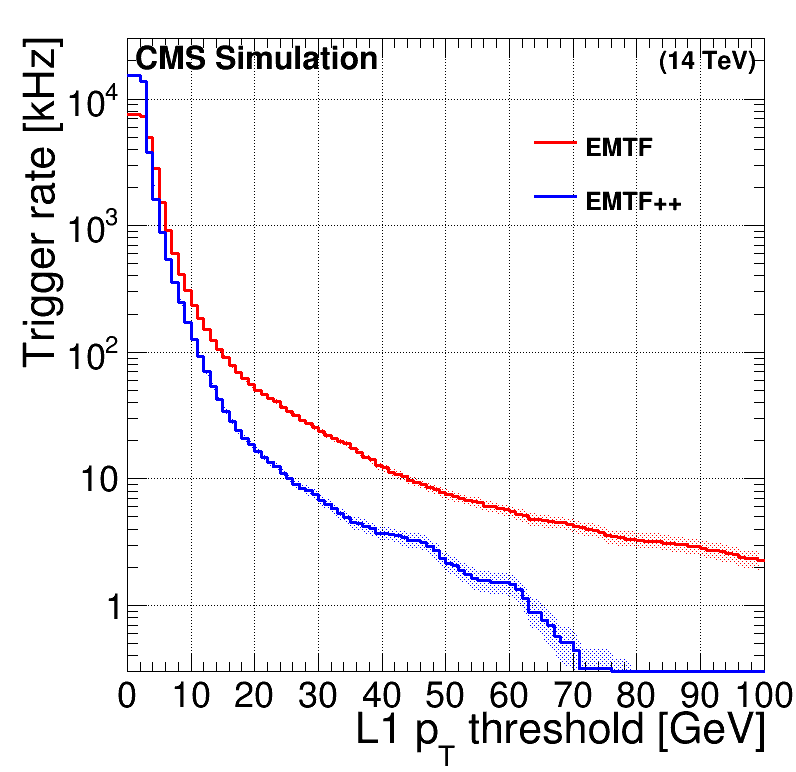

In [16]:
hname = 'emtf_absEtaMin1.24_absEtaMax2.4_qmin12_pt'

with root_open(infile_rates_200) as f:
  h_nevents = f.Get('nevents')
  assert(h_nevents != None)
  nevents = h_nevents.GetBinContent(2)
  
  h1a = f.Get('highest_' + hname)
  h1a.SetDirectory(0) # memory resident
  make_ptcut(h1a)
  make_rate(h1a, nevents)
  old_rates = [h1a.GetBinContent(h1a.FindBin(x)) for x in [18,20,22,25]]
  print('old rates @18/20/22/25 GeV: {0}, {1}, {2}, {3}'.format(*old_rates))
  
  h1b = f.Get('highest_' + hname2026_f(hname))
  h1b.SetDirectory(0) # memory resident
  make_ptcut(h1b)
  make_rate(h1b, nevents)
  new_rates = [h1b.GetBinContent(h1b.FindBin(x)) for x in [18,20,22,25]]
  print('new rates @18/20/22/25 GeV: {0}, {1}, {2}, {3}'.format(*new_rates))

doit()

### 1.6) Rate vs pT

EMTF++ purity: i.e. different lines for total rate, for fakes, for true muons

In [17]:
def doit():
  PlotName = 'rate_vs_pt_purity'
  LogY = True
  DisplayGrid = True
  Lumi = ''
  minimumX = 0.
  maximumX = 100.
  minimumY = 0.3
  maximumY = 3e4
  xtitle = 'L1 p_{T} threshold [GeV]'
  ytitle = 'Trigger rate [kHz]'
  
  # canvas
  myCanvas = create_canvas(PlotName, LogY, DisplayGrid)
  myCanvas.Draw()
  
  # a function / a histo
  myFunction = h1b_a
  
  # axis labels ranges & names
  myFunction.SetMinimum(minimumY)
  myFunction.SetMaximum(maximumY)
  myFunction.GetXaxis().SetRangeUser(minimumX,maximumX)
  myFunction.GetYaxis().SetTitle(ytitle)
  myFunction.GetXaxis().SetTitle(xtitle)
  #myFunction.GetXaxis().SetTitleOffset(1.2)
  #myFunction.GetYaxis().SetTitleOffset(1.4)
  
  # line style
  #myFunction.SetLineColor(600)  # kBlue
  #myFunction.SetLineWidth(3)
  h1b_a.linecolor = color_b
  h1b_b.linecolor = '#0080ff'
  h1b_c.linecolor = '#ff8000'
  h1b_a.linewidth = 3
  h1b_b.linewidth = 3
  h1b_c.linewidth = 3
  h1b_a.fillcolor = color_b
  h1b_b.fillcolor = '#0080ff'
  h1b_c.fillcolor = '#ff8000'
  h1b_a.fillstyle = 3003
  h1b_b.fillstyle = 3003
  h1b_c.fillstyle = 3003
  
  # drawing
  #myFunction.Draw("hist")
  h1b_a.Draw("e3")
  h1b_b.Draw("e3 same")
  h1b_c.Draw("e3 same")
  h1b_a_no_fill = h1b_a.Clone(h1b_a.GetName() + "_no_fill")
  h1b_a_no_fill.fillstyle = 0
  h1b_a_no_fill.Draw("hist same")
  h1b_b_no_fill = h1b_b.Clone(h1b_b.GetName() + "_no_fill")
  h1b_b_no_fill.fillstyle = 0
  h1b_b_no_fill.Draw("hist same")
  h1b_c_no_fill = h1b_c.Clone(h1b_c.GetName() + "_no_fill")
  h1b_c_no_fill.fillstyle = 0
  h1b_c_no_fill.Draw("hist same")
  
  # legend
  #leg = TLegend(0.14,0.76,0.75,0.86)
  #leg.SetBorderSize(0)
  #leg.SetFillStyle(0)
  #leg.SetTextSize(0.035)
  #leg.SetHeader("here is a beautiful header")
  #leg.AddEntry(myFunction,"description of myFunction")
  leg = Legend(3, topmargin=0.1, textsize=0.035)
  leg.SetBorderSize(0)
  leg.AddEntry(h1b_a_no_fill, "Total", "l")
  leg.AddEntry(h1b_b_no_fill, "Muon", "l")
  leg.AddEntry(h1b_c_no_fill, "Fakes", "l")
  leg.Draw("same")
  
  # keepalive
  keepalive(h1b_a, myFunction)
  keepalive(h1b_a, leg)
  keepalive(h1b_a, h1b_a_no_fill)
  keepalive(h1b_a, h1b_b_no_fill)
  keepalive(h1b_a, h1b_c_no_fill)
  
  # save
  draw_prelim_label(PlotName)
  draw_lumi_label(PlotName, Lumi)
  save_canvas(PlotName, PlotName)
  return

INFO:ROOT.TCanvas.Print] pdf file rate_vs_pt_purity.pdf has been created


new rates @18/20/22/25 GeV: 20.9044017792, 16.420375824, 13.5152320862, 10.0416908264
new rates @18/20/22/25 GeV: 11.6837282181, 8.96805095673, 7.38916873932, 5.24188899994
new rates @18/20/22/25 GeV: 9.22067260742, 7.45232439041, 6.12606287003, 4.79980182648


INFO:ROOT.TCanvas.SaveAs] ROOT file rate_vs_pt_purity.root has been created


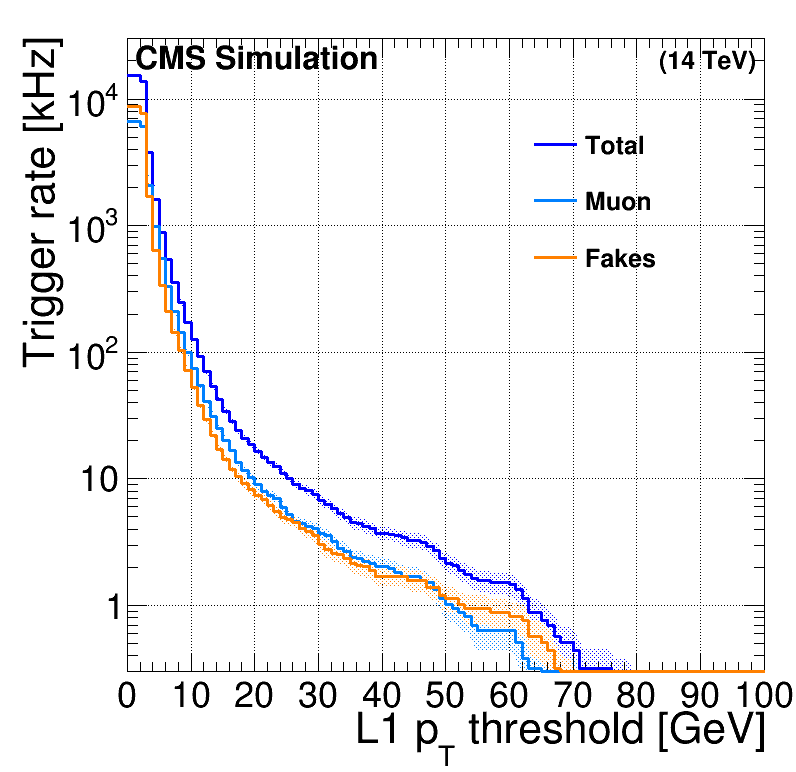

In [18]:
hname = 'emtf_absEtaMin1.24_absEtaMax2.4_qmin12_pt'

with root_open(infile_rates_200) as f:
  h_nevents = f.Get('nevents')
  assert(h_nevents != None)
  nevents = h_nevents.GetBinContent(2)
  
  h1b_a = f.Get('highest_' + hname2026_f(hname.replace('_qmin12', '_qmin12')))
  h1b_a.SetDirectory(0) # memory resident
  make_ptcut(h1b_a)
  make_rate(h1b_a, nevents)
  new_rates = [h1b_a.GetBinContent(h1b_a.FindBin(x)) for x in [18,20,22,25]]
  print('new rates @18/20/22/25 GeV: {0}, {1}, {2}, {3}'.format(*new_rates))
  
  h1b_b = f.Get('highest_' + hname2026_f(hname.replace('_qmin12', '_qmin12_matched1')))
  h1b_b.SetDirectory(0) # memory resident
  make_ptcut(h1b_b)
  make_rate(h1b_b, nevents)
  new_rates = [h1b_b.GetBinContent(h1b_b.FindBin(x)) for x in [18,20,22,25]]
  print('new rates @18/20/22/25 GeV: {0}, {1}, {2}, {3}'.format(*new_rates))
  
  h1b_c = f.Get('highest_' + hname2026_f(hname.replace('_qmin12', '_qmin12_matched0')))
  h1b_c.SetDirectory(0) # memory resident
  make_ptcut(h1b_c)
  make_rate(h1b_c, nevents)
  new_rates = [h1b_c.GetBinContent(h1b_c.FindBin(x)) for x in [18,20,22,25]]
  print('new rates @18/20/22/25 GeV: {0}, {1}, {2}, {3}'.format(*new_rates))

doit()

### 1.7) Rate vs PU

EMTF++ up to PU 300, for a nominal pT>20 threshold

In [19]:
def find_slope(x, y):
  from sklearn.linear_model import LinearRegression
  reg = LinearRegression(fit_intercept=False).fit(np.atleast_2d(x).T, y)
  return reg.coef_[0]

In [20]:
def doit():
  PlotName = 'rate_vs_pu'
  LogY = False
  DisplayGrid = True
  Lumi = ''
  minimumX = 0.
  maximumX = 350.
  minimumY = 0.
  maximumY = 50.
  xtitle = '<PU>'
  ytitle = 'Trigger rate [kHz]'
  
  # canvas
  myCanvas = create_canvas(PlotName, LogY, DisplayGrid)
  myCanvas.Draw()
  
  # a function / a histo
  gr = Graph(2)
  gr.SetPoint(0, minimumX, minimumY)
  gr.SetPoint(1, maximumX, maximumY)
  gr.Draw("ap")
  myFunction = gr.GetHistogram()
  
  # axis labels ranges & names
  myFunction.SetMinimum(minimumY)
  myFunction.SetMaximum(maximumY)
  myFunction.GetXaxis().SetRangeUser(minimumX,maximumX)
  myFunction.GetYaxis().SetTitle(ytitle)
  myFunction.GetXaxis().SetTitle(xtitle)
  #myFunction.GetXaxis().SetTitleOffset(1.2)
  #myFunction.GetYaxis().SetTitleOffset(1.4)
  myFunction.GetYaxis().SetNdivisions(505)
  
  # line style
  #myFunction.SetLineColor(600)  # kBlue
  #myFunction.SetLineWidth(3)
  gr1a.linecolor = color_a
  gr1b.linecolor = color_b
  gr1a.linewidth = 3
  gr1b.linewidth = 3
  gr1a.markercolor = color_a
  gr1b.markercolor = color_b
  gr1a.markerstyle = 'circle'
  gr1b.markerstyle = 'circle'
  
  # drawing
  myFunction.Draw()
  #gr1a.Draw("p same")
  gr1b.Draw("p same")
  
  if True:
    m = find_slope(list(gr1a.x()), list(gr1a.y()))
    gr1a_lin = Graph(2)
    gr1a_lin.SetPoint(0, minimumX, minimumX * m)
    gr1a_lin.SetPoint(1, maximumX, maximumX * m)
    m = find_slope(list(gr1b.x()), list(gr1b.y()))
    gr1b_lin = Graph(2)
    gr1b_lin.SetPoint(0, minimumX, minimumX * m)
    gr1b_lin.SetPoint(1, maximumX, maximumX * m)
    #
    gr1a_lin.linecolor = color_a
    gr1b_lin.linecolor = color_b
    gr1a_lin.linestyle = 7  # dashed
    gr1b_lin.linestyle = 7  # dashed
    #
    #gr1a_lin.Draw("same")
    gr1b_lin.Draw("same")
  
  # legend
  #leg = TLegend(0.14,0.76,0.75,0.86)
  #leg.SetBorderSize(0)
  #leg.SetFillStyle(0)
  #leg.SetTextSize(0.035)
  #leg.SetHeader("here is a beautiful header")
  #leg.AddEntry(myFunction,"description of myFunction")
  leg = Legend(2, topmargin=0.1, textsize=0.035)
  leg.SetBorderSize(0)
  leg.AddEntry(gr1a, "EMTF")
  leg.AddEntry(gr1b, "EMTF++")
  #leg.Draw("same")
  
  # keepalive
  keepalive(gr1a, myFunction)
  keepalive(gr1a, leg)
  keepalive(gr1a, gr)
  keepalive(gr1a, gr1a_lin)
  keepalive(gr1a, gr1b_lin)
  
  # save
  draw_prelim_label(PlotName)
  draw_lumi_label(PlotName, Lumi)
  save_canvas(PlotName, PlotName)
  return

INFO:ROOT.TCanvas.Print] pdf file rate_vs_pu.pdf has been created
INFO:ROOT.TCanvas.SaveAs] ROOT file rate_vs_pu.root has been created


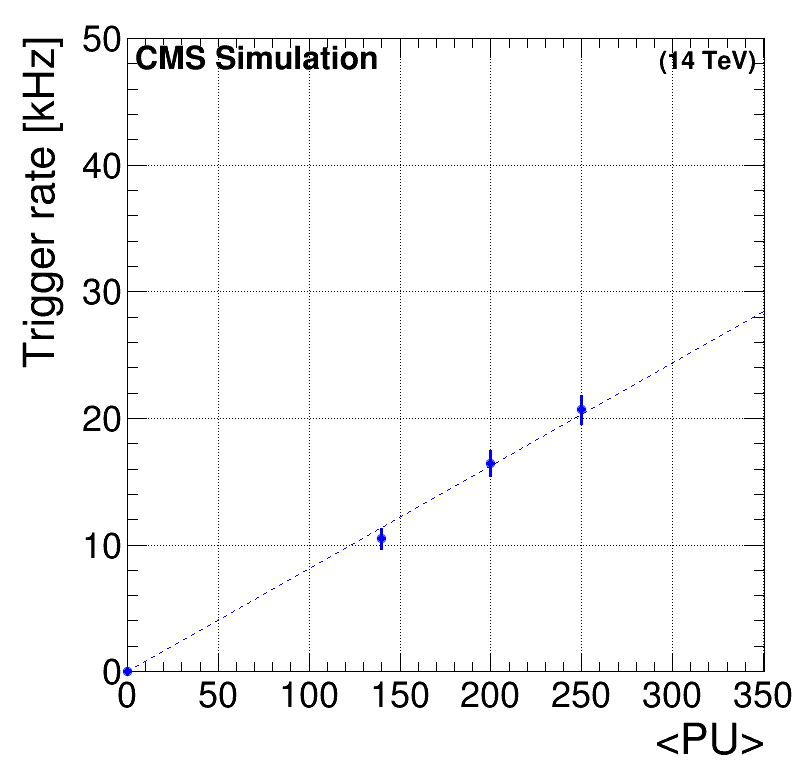

In [21]:
hname = 'emtf_absEtaMin1.24_absEtaMax2.4_qmin12_pt'

#pileup_list = [140, 200, 250, 300]
#infile_list = [infile_rates_140, infile_rates, infile_rates_250, infile_rates_300]

pileup_list = [140, 200, 250]
infile_list = [infile_rates_140, infile_rates_200, infile_rates_250]

gr1a = Graph(len(pileup_list) + 1)
gr1b = Graph(len(pileup_list) + 1)

for i, (pu, infile) in enumerate(zip(pileup_list, infile_list)):
  with root_open(infile) as f:
    h_nevents = f.Get('nevents')
    assert(h_nevents != None)
    nevents = h_nevents.GetBinContent(2)

    h1a = f.Get('highest_' + hname)
    h1a.SetDirectory(0) # memory resident
    make_ptcut(h1a)
    make_rate(h1a, nevents)
    rate, rate_err = h1a.GetBinContent(h1a.FindBin(20)), h1a.GetBinError(h1a.FindBin(20))
    gr1a.SetPoint(i, pu, rate)
    gr1a.SetPointError(i, 0, 0, rate_err, rate_err)

    h1b = f.Get('highest_' + hname2026_f(hname))
    h1b.SetDirectory(0) # memory resident
    make_ptcut(h1b)
    make_rate(h1b, nevents)
    rate, rate_err = h1b.GetBinContent(h1b.FindBin(20)), h1b.GetBinError(h1b.FindBin(20))
    gr1b.SetPoint(i, pu, rate)
    gr1b.SetPointError(i, 0, 0, rate_err, rate_err)

doit()